GLOBAL AI HUB INTERNATIONAL BOOTCAMP FOR INTRODUCTION TO MACHINE LEARNING ON MEDICAL COST ANALYSIS.

NAME: SALISU IBRAHIM

GROUP: 23

NATIONALITY: NIGERIA

IMPORTING THE REQUIRED LIBRARIES

In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, ridge_regression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVR
from sklearn.linear_model import LassoCV,RidgeCV,Lasso,Ridge
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV,KFold
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
import plotly.express as ex
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

UPLOADING AND READING THE DATASET

In [2]:
#uploading and reading the dataset
medical_data = pd.read_csv('/insurance.csv')
medical_data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [3]:
medical_data.tail(10)

,age,sex,bmi,children,smoker,region,charges
1328,23,female,24.225,2,no,northeast,22395.74424
1329,52,male,38.600,2,no,southwest,10325.20600
1330,57,female,25.740,2,no,southeast,12629.16560
1331,23,female,33.400,0,no,southwest,10795.93733
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500
1337,61,female,29.070,0,yes,northwest,29141.36030


In [4]:
#checking the information of the dataset
medical_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
#checking the shape of the dataset
medical_data.shape

(1338, 7)

CHECKING THE MISSING VALUES

In [6]:
#chacking the missing values
medical_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

DESCRIPTIVE STATISTICS 

In [7]:
#descriptive statistics of the data
medical_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
#descriptive statistics for numerical and categorical columns
medical_data.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


DATA CLEANING

In [9]:
#converting string columns to numeriacl
medical_data['sex'].unique()

array(['female', 'male'], dtype=object)

In [10]:
#converting sex columns to numeric
medical_data['sex']=medical_data['sex'].map({'female':0, 'male':1})

In [11]:
medical_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [12]:
#converting smoker columns to numeric
medical_data['smoker']=medical_data['smoker'].map({'yes':1, 'no':0})

In [13]:
medical_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [14]:
#converting region columns to numeric
medical_data['region'] = medical_data['region'].map({'southwest':1, 'southeast':2, 'northwest':3, 'northeast':4})

In [15]:
medical_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520


EXPLORATORY DATA ANALYSIS

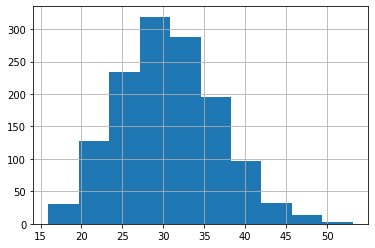

In [16]:
#Examining the distribution of body mass indes
medical_data["bmi"].hist()


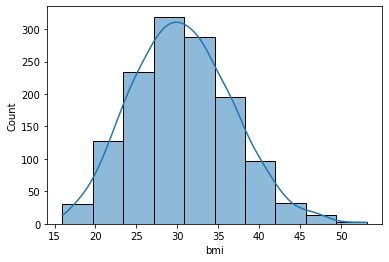

In [17]:
from seaborn.distributions import histplot
sns.histplot(medical_data['bmi'], kde=True, bins=10)

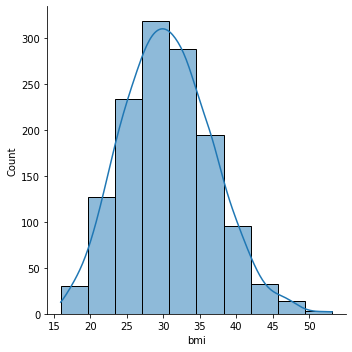

In [18]:
#distribution function for body mass index
sns.displot(medical_data['bmi'], kde=True, bins=10)

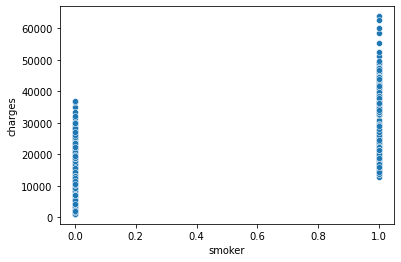

In [19]:
#Examine the relationship between “smoker” and “charges”
sns.scatterplot(x="smoker", y="charges", data=medical_data, palette="YlGnBu")

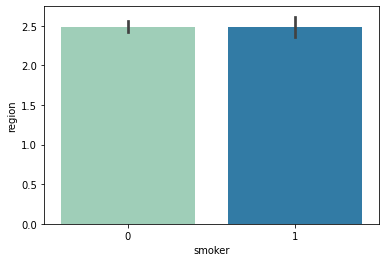

In [20]:
sns.barplot(x="smoker", y="region", data=medical_data, palette="YlGnBu")

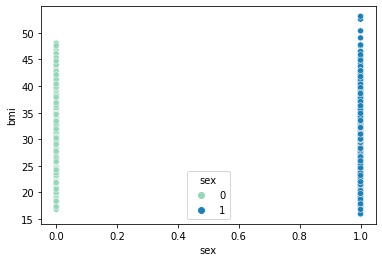

In [21]:
from typing import Any
#Examine the relationship between “bmi” and “sex”
sns.scatterplot(x="sex", y="bmi", data=medical_data, hue="sex", palette="YlGnBu")

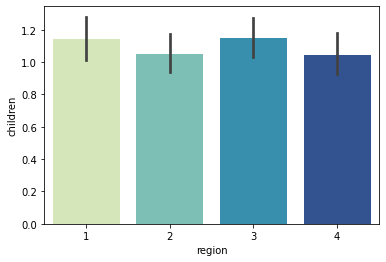

In [22]:
#Find the "region" with the most "children".
sns.barplot(x="region", y="children", data=medical_data, palette="YlGnBu")

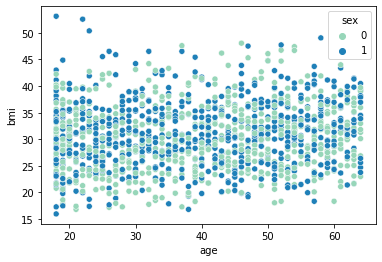

In [23]:
#Examine the relationship between “age” and “bmi”
sns.scatterplot(x="age", y="bmi", data=medical_data, hue="sex", palette="YlGnBu")

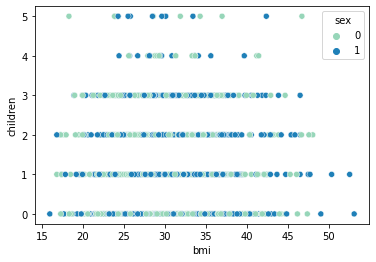

In [24]:
#Examine the relationship between “bmi” and “children”
sns.scatterplot(x="bmi", y="children", data=medical_data, hue="sex", palette="YlGnBu")

In [25]:
#Is there an outlier in the "bmi" variable? Please review

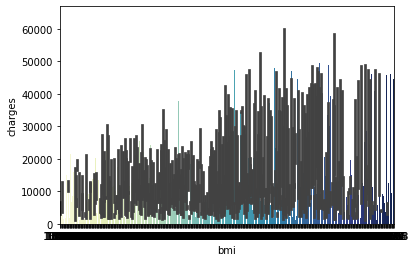

In [26]:
#Examine the relationship between “bmi” and “charges”
sns.barplot(x="bmi", y="charges", data=medical_data, palette="YlGnBu")

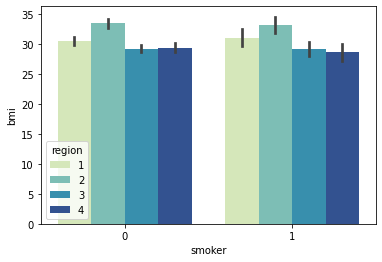

In [27]:
#Examine the relationship between “region”, “smoker” and “bmi” using bar plot.
sns.barplot(x="smoker", y="bmi", data=medical_data, hue="region", palette="YlGnBu")

DATA PREPROCESSING

In [28]:
X = medical_data.drop(['charges'], axis=1)

In [29]:
y = medical_data['charges']

SPLITING THE DATA INTO TRAINING AND TESTING

In [30]:
#Data spliting into training and testing
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [31]:
y_train

560      9193.83850
1285     8534.67180
1142    27117.99378
969      8596.82780
486     12475.35130
           ...     
1095     4561.18850
1130     8582.30230
1294    11931.12525
860     46113.51100
1126    10214.63600
Name: charges, Length: 1070, dtype: float64

MODELS TRAINING

In [32]:
l_reg = LinearRegression()
l_reg.fit(X_train, y_train)

support_vector_machine = SVR()
support_vector_machine.fit(X_train, y_train)

random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train)

gradient_booster_reg = GradientBoostingRegressor()
gradient_booster_reg.fit(X_train, y_train)


GradientBoostingRegressor()

PREDICTION THE DATASET

In [33]:
y_pred1 = l_reg.predict(X_test)
y_pred2 = support_vector_machine.predict(X_test)
y_pred3 = random_forest.predict(X_test)
y_pred4 = gradient_booster_reg.predict(X_test)

prediction1 = pd.DataFrame({'Actual': y_test, 'L_reg': y_pred1,
                           'support_vector_machine': y_pred2, 'random_forest': y_pred3, 'gradient_booster_reg': y_pred4} )

In [34]:
prediction1

,Actual,L_reg,support_vector_machine,random_forest,gradient_booster_reg
764,9095.06825,8924.407244,9548.261584,10761.020033,11001.128629
887,5272.17580,7116.295018,9492.515425,5696.167788,5840.174656
890,29330.98315,36909.013521,9648.758701,27982.138216,28001.980112
1293,9301.89355,9507.874691,9555.044136,10872.366248,9745.291602
259,33750.29180,27013.350008,9420.421978,34591.702813,33639.100981
...,...,...,...,...,...
109,47055.53210,39116.968669,9648.902852,46995.717485,45431.423211
575,12222.89830,11814.555568,9625.431547,12555.668927,12465.025294
535,6067.12675,7638.107736,9504.168517,6459.512795,6974.336525
543,63770.42801,40959.081722,9605.004594,46493.934710,47862.047791


COMPARING THE PERFOMANCE

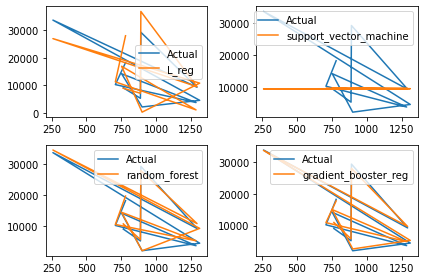

In [35]:
#by applying the matplotlib for comparing the perfomance 
plt.subplot(221)
plt.plot(prediction1['Actual'].iloc[0:11], label='Actual')
plt.plot(prediction1['L_reg'].iloc[0:11], label="L_reg")
plt.legend()

plt.subplot(222)
plt.plot(prediction1['Actual'].iloc[0:11], label='Actual')
plt.plot(prediction1['support_vector_machine'].iloc[0:11], label="support_vector_machine")
plt.legend()

plt.subplot(223)
plt.plot(prediction1['Actual'].iloc[0:11], label='Actual')
plt.plot(prediction1['random_forest'].iloc[0:11], label="random_forest")
plt.legend()

plt.subplot(224)
plt.plot(prediction1['Actual'].iloc[0:11], label='Actual')
plt.plot(prediction1['gradient_booster_reg'].iloc[0:11], label="gradient_booster_reg")

plt.tight_layout()

plt.legend()

From the plot above we can observed that model 3 and 4 are appears to be very closed to the actual values, Model 1 is not matching with actual values, And finally the model 1 is predicted the constant value.

MODEL EVALUATION

In [36]:
from sklearn import metrics
score1 = metrics.r2_score(y_test, y_pred1)
score2 = metrics.r2_score(y_test, y_pred2)
score3 = metrics.r2_score(y_test, y_pred3)
score4 = metrics.r2_score(y_test, y_pred4)

In [37]:
#print the r2 scores
print(score1, score2, score3, score4)

0.7833463107364539 -0.07229762787861826 0.8643900756761692 0.8779726251291786


In [38]:
#applying mean absolute error for model evaluation
mean_arror1 = metrics.mean_absolute_error(y_test, y_pred1)
mean_arror2 = metrics.mean_absolute_error(y_test, y_pred2)
mean_arror3 = metrics.mean_absolute_error(y_test, y_pred3)
mean_arror4 = metrics.mean_absolute_error(y_test, y_pred4)

In [39]:
#printing the mean absolute error
print(mean_arror1, mean_arror2, mean_arror3, mean_arror1, mean_arror4)

4186.508898366434 8592.428727899724 2474.541125652799 4186.508898366434 2447.9515580545844


From the above evaluations we can concluded that the model 4 which is gradient booster regression is the best model for this dataset.